In [72]:
#dependencies
import pandas as pd
import numpy as np
import datetime as dt
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [78]:
def pathogenify(marketdf, virusdf):
    marketdf = marketdf.loc[virusdf.index[0]:virusdf.index[-1]]

    market_virus_df = pd.merge(marketdf,virusdf,left_index=True, right_index=True, how='outer')
   
    market_virus_df.columns = ['Market','Deaths']
 
    market_virus_df.fillna(method='ffill', inplace=True)
   
    market_virus_df['Pct_Chng_Market'] = market_virus_df['Market'].pct_change()*100
    market_virus_df['Pct_Chng_Death'] = market_virus_df['Deaths'].pct_change()*100
    return market_virus_df.head()

In [81]:
Sars

Market  Deaths  Pct_Chng_Market  Pct_Chng_Death
2003-03-17  8141.919922       4              NaN             NaN
2003-03-18  8194.230469       4         0.642484        0.000000
2003-03-19  8265.450195       9         0.869145      125.000000
2003-03-20  8286.599609      10         0.255877       11.111111
2003-03-21  8521.969727      10         2.840370        0.000000

No handles with labels found to put in legend.


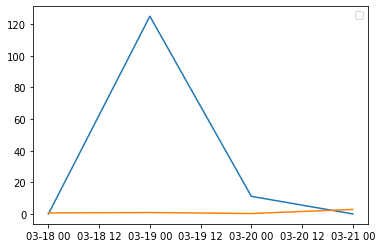

In [83]:
plt.plot(Sars.index,Sars['Pct_Chng_Death'])
plt.plot(Sars,Sars['Pct_Chng_Market'])
plt.legend()
plt.show()

In [80]:
#TESTING OF PATHEOGEN TO DJIA/SARS
Sars = pathogenify(dji_df,sars_grouped_df)

In [43]:
#store djia market data from CSV as a dataframe
file_dji = './Resources/DJI.csv'
dji_df = pd.read_csv(file_dji)
dji_df.head()

Date          Open          High           Low         Close  \
0  2000-01-03  11501.849609  11522.009766  11305.690430  11357.509766   
1  2000-01-04  11349.750000  11350.059570  10986.450195  10997.929688   
2  2000-01-05  10989.370117  11215.099609  10938.669922  11122.650391   
3  2000-01-06  11113.370117  11313.450195  11098.450195  11253.259766   
4  2000-01-07  11247.059570  11528.139648  11239.919922  11522.559570   

      Adj Close     Volume  
0  11357.509766  169750000  
1  10997.929688  178420000  
2  11122.650391  203190000  
3  11253.259766  176550000  
4  11522.559570  184900000

In [44]:
#transform data as-needed
dji_df['DATE'] = pd.to_datetime(dji_df['Date'])
dji_df = dji_df.set_index('DATE')

#exception handle for re-runs
try:
    del dji_df['Date']
    del dji_df['Open']
    del dji_df['High']
    del dji_df['Low']
    del dji_df['Adj Close']
    del dji_df['Volume']
except KeyError:
    print('One or more keys not available for deletion (potential re-run)')
    pass

dji_df = dji_df.rename(columns={'Close':"Close_DJIA"})
dji_df.head()

Close_DJIA
DATE                    
2000-01-03  11357.509766
2000-01-04  10997.929688
2000-01-05  11122.650391
2000-01-06  11253.259766
2000-01-07  11522.559570

In [15]:
def percent_change(NEW,OLD):
    ((NEW - OLD)/ OLD)*100

In [36]:
test_df = dji_df.loc[sars_grouped_df.index[0]:sars_grouped_df.index[-1]]
test2_df = pd.merge(test_df,sars_grouped_df,left_index=True, right_index=True,how='outer')
test2_df.columns = ['Market','Death']
test2_df



#test2_df['Pct_Chng_Market'] = test2_df['Market'].apply(
      #  lambda x: (x.shift(1) - x)/ x)

test2_df['PCTCHNG_MRKT'] = test2_df['Market'].pct_change()*100
test2_df.head()

Market  Death  PCTCHNG_MRKT
2003-03-17  8141.919922      4           NaN
2003-03-18  8194.230469      4      0.642484
2003-03-19  8265.450195      9      0.869145
2003-03-20  8286.599609     10      0.255877
2003-03-21  8521.969727     10      2.840370

In [ ]:
test2_df.Market - test2_df.Market.shift(1)

In [ ]:
print(sars_grouped_df.head())
print(sars_grouped_df.tail())

In [ ]:
#store djia market data from CSV as a dataframe
file_nasdaq = './Resources/NASDAQCOM.csv'
nasdaq_df = pd.read_csv(file_nasdaq)
nasdaq_df.head()

In [6]:
#transform data as-needed
nasdaq_df = nasdaq_df.rename(columns={'NASDAQCOM': 'Close_NASDAQCOMPOSITE','DATE':'Date'})
nasdaq_df = nasdaq_df.set_index('Date')
nasdaq_df.head()

NameError: name 'nasdaq_df' is not defined

In [45]:
#store SARS data from CSV as a dataframe
file_sars = './Resources/sars_2003_complete_dataset_clean.csv'
sars_df = pd.read_csv(file_sars)
sars_df.head()

Date               Country  Cumulative number of case(s)  \
0  2003-03-17               Germany                             1   
1  2003-03-17                Canada                             8   
2  2003-03-17             Singapore                            20   
3  2003-03-17  Hong Kong SAR, China                            95   
4  2003-03-17           Switzerland                             2   

   Number of deaths  Number recovered  
0                 0                 0  
1                 2                 0  
2                 0                 0  
3                 1                 0  
4                 0                 0

In [46]:
#transform data as-needed
del sars_df['Cumulative number of case(s)']
del sars_df['Number recovered']
sars_grouped_df = pd.DataFrame(sars_df.groupby('Date').sum())
sars_grouped_df.head()

Number of deaths
Date                        
2003-03-17                 4
2003-03-18                 4
2003-03-19                 9
2003-03-20                10
2003-03-21                10

In [9]:
#store H1N1 data from CSV as a dataframe
file_h1n1 = './Resources/Pandemic (H1N1) 2009.csv'
h1n1_df = pd.read_csv(file_h1n1, encoding = 'latin1')
h1n1_df.head()

Country  Cases  Deaths    Update Time
0              Algeria      5     0.0  7/6/2009 9:00
1  Antigua and Barbuda      2     0.0  7/6/2009 9:00
2            Argentina   2485    60.0  7/6/2009 9:00
3            Australia   5298    10.0  7/6/2009 9:00
4              Austria     19     0.0  7/6/2009 9:00

In [10]:
#transform data as-needed
h1n1_df['DateTime'] = pd.to_datetime(h1n1_df['Update Time'])
h1n1_df['Date'] = h1n1_df['DateTime'].dt.date
h1n1_groupby_df = pd.DataFrame(h1n1_df.groupby('Date').sum())
del h1n1_groupby_df['Cases']
h1n1_groupby_df.head()

Deaths
Date              
2009-05-23   172.0
2009-05-25   182.0
2009-05-26   184.0
2009-05-27   190.0
2009-05-29   198.0

In [11]:
#store Ebola data from CSV as a dataframe
file_ebola = './Resources/ebola_2014_2016_clean.csv'
ebola_df = pd.read_csv(file_ebola)
ebola_df.head()

Country        Date  No. of suspected cases  No. of probable cases  \
0        Guinea  2014-08-29                    25.0                  141.0   
1       Nigeria  2014-08-29                     3.0                    1.0   
2  Sierra Leone  2014-08-29                    54.0                   37.0   
3       Liberia  2014-08-29                   382.0                  674.0   
4  Sierra Leone  2014-09-05                    78.0                   37.0   

   No. of confirmed cases  No. of confirmed, probable and suspected cases  \
0                   482.0                                           648.0   
1                    15.0                                            19.0   
2                   935.0                                          1026.0   
3                   322.0                                          1378.0   
4                  1146.0                                          1261.0   

   No. of suspected deaths  No. of probable deaths  No. of confirmed deaths  \
0                      2.0                   141.0                    287.0   
1                      0.0                     1.0                      6.0   
2                      8.0                    34.0                    380.0   
3                    168.0                   301.0                    225.0   
4                     11.0                    37.0                    443.0   

   No. of confirmed, probable and suspected deaths  
0                                            430.0  
1                                              7.0  
2                                            422.0  
3                                            694.0  
4                                            491.0

In [13]:
#transform data as-needed
ebola_df = pd.DataFrame(ebola_df.groupby('Date').sum())
ebola_df

No. of suspected cases  No. of probable cases  \
Date                                                        
2014-08-29                   464.0                  853.0   
2014-09-05                   506.0                 1078.0   
2014-09-08                   583.0                 1158.0   
2014-09-12                   588.0                 1163.0   
2014-09-16                   690.0                 1278.0   
...                            ...                    ...   
2015-12-17                 10768.0                 2621.0   
2015-12-22                 10767.0                 2621.0   
2015-12-23                 10767.0                 2621.0   
2015-12-29                 10767.0                 2621.0   
2016-03-23                 10767.0                 2624.0   

            No. of confirmed cases  \
Date                                 
2014-08-29                  1754.0   
2014-09-05                  2383.0   
2014-09-08                  2552.0   
2014-09-12                  2639.0   
2014-09-16                  3017.0   
...                            ...   
2015-12-17                 15249.0   
2015-12-22                 15249.0   
2015-12-23                 15249.0   
2015-12-29                 15249.0   
2016-03-23                 15251.0   

            No. of confirmed, probable and suspected cases  \
Date                                                         
2014-08-29                                          3071.0   
2014-09-05                                          3967.0   
2014-09-08                                          4293.0   
2014-09-12                                          4390.0   
2014-09-16                                          4985.0   
...                                                    ...   
2015-12-17                                         28638.0   
2015-12-22                                         28637.0   
2015-12-23                                         28637.0   
2015-12-29                                         28637.0   
2016-03-23                                         28642.0   

            No. of suspected deaths  No. of probable deaths  \
Date                                                          
2014-08-29                    178.0                   477.0   
2014-09-05                    271.0                   591.0   
2014-09-08                    311.0                   609.0   
2014-09-12                    227.0                   613.0   
2014-09-16                    276.0                   672.0   
...                             ...                     ...   
2015-12-17                    158.0                   662.0   
2015-12-22                    158.0                   662.0   
2015-12-23                    158.0                   662.0   
2015-12-29                    158.0                   662.0   
2016-03-23                    158.0                   665.0   

            No. of confirmed deaths  \
Date                                  
2014-08-29                    898.0   
2014-09-05                   1243.0   
2014-09-08                   1376.0   
2014-09-12                   1386.0   
2014-09-16                   1513.0   
...                             ...   
2015-12-17                   5683.0   
2015-12-22                   5683.0   
2015-12-23                   5683.0   
2015-12-29                   5683.0   
2016-03-23                   5684.0   

            No. of confirmed, probable and suspected deaths  
Date                                                         
2014-08-29                                           1553.0  
2014-09-05                                           2105.0  
2014-09-08                                           2296.0  
2014-09-12                                           2226.0  
2014-09-16                                           2461.0  
...                                                     ...  
2015-12-17                                          11315.0  
2015-12-22                    

In [48]:
#store Covid-19 data from CSV as a dataframe
file_covid = './Resources/covid_19_clean_complete.csv'
covid_df = pd.read_csv(file_covid)
covid_df.head()

Province/State  Country/Region      Lat      Long     Date  Confirmed  \
0          Anhui  Mainland China  31.8257  117.2264  1/22/20          1   
1        Beijing  Mainland China  40.1824  116.4142  1/22/20         14   
2      Chongqing  Mainland China  30.0572  107.8740  1/22/20          6   
3         Fujian  Mainland China  26.0789  117.9874  1/22/20          1   
4          Gansu  Mainland China  36.0611  103.8343  1/22/20          0   

   Deaths  Recovered  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0

In [ ]:
def percent_change(NEW,OLD):
    ((NEW - OLD)/ OLD)*100

#define function for use
def pathogenify(marketdf, virusdf):
#due to gaps in dates between virus measures, restrict market data to the overall range between min and max dates
    marketdf = marketdf.loc[virusdf.index[0]:virusdf.index[-1]]
#perform outer join of market data
    market_virus_df = pd.merge(marketdf,virusdf,left_index=True, right_index=True, how='outer')
#rename columns 
    market_virus_df.columns = ['Market','Deaths']
#forward fill NAs between dates (as applicable)
	market_virus_df.fillna(method='ffill', inplace=True)

#lambda function for percentage change in 1) market price and 2) death count

	market_virus_df['Pct_Chng_Market'] = market_virus_df['Market'].apply(
		lambda x: percent_change(x.shift(1),x)
		) 

	market_virus_df['Pct_Chng_Death'] = market_virus_df['Death'].apply(
		lambda x: percent_change(x.shift(1),x)
		) 

In [ ]:
#transform data as-needed

In [ ]:
#connect to AWS cloud database
connection_string = ''
engine = create_engine(f'postgresql://{connection_string}')

In [ ]:
#check tables
engine.table_names()

In [ ]:
#use pandas to load market data df into database
<dataframe>.to_sql(name = '<name>', con = engine, if_exists = 'replace')

In [ ]:
#use pandas to load SARS data df into database

In [ ]:
#use pandas to load H1N1 data df into database

In [ ]:
#use pandas to load Ebola data df into database

In [ ]:
#use pandas to load Covid-19 data df into database

In [ ]:
#query tables to validate load
<df>.read_sql_query('<query>', con = engine).head()